<a href="https://colab.research.google.com/github/Scor999/Data_collection_and_markup/blob/main/dz8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
train_file_path = "/content/train.csv"

In [102]:
# Прочитать датасет в DataFrame
df = pd.read_csv('train.csv')

In [103]:
# Показать первые несколько строк датасета
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [105]:
# Заменить все значения NaN на 0
df.fillna(0, inplace=True)

In [106]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [107]:
# Предварительная обработка данных
# a. Обработка отсутствующих значений
# Посмотрим на количество отсутствующих значений в каждом столбце
missing_values = df.isnull().sum()
print("Отсутствующие значения в каждом столбце:")
print(missing_values)

Отсутствующие значения в каждом столбце:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [108]:
# b. Обработка дублирующихся строк
# Просмотр дублирующихся строк
duplicates_count = df.duplicated().sum()
print("Количество дублирующихся строк в DataFrame:", duplicates_count)

Количество дублирующихся строк в DataFrame: 0


In [109]:
# Основные статистики для числовых переменных
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


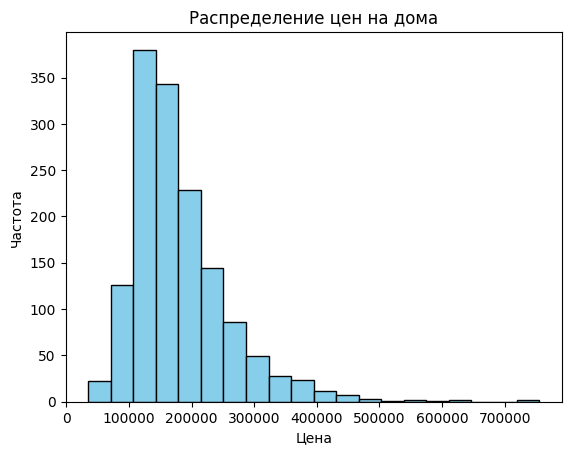

In [110]:
# Распределение целевой переменной 'SalePrice'
plt.hist(df['SalePrice'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение цен на дома')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()


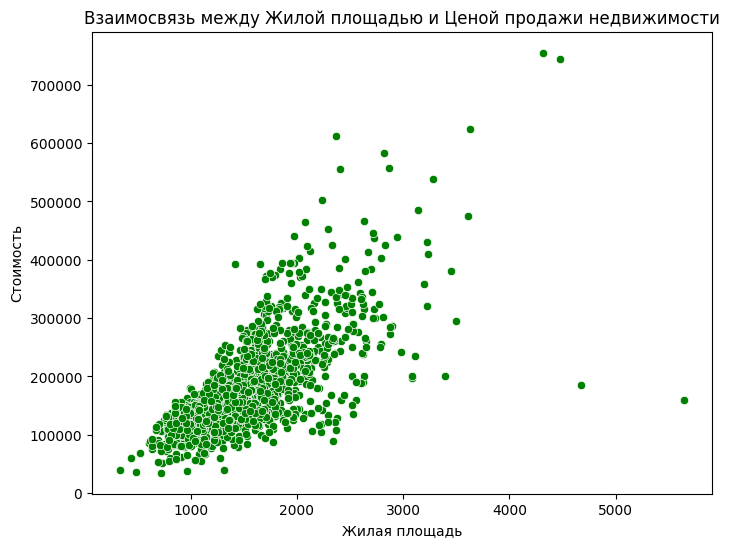

In [114]:
# Диаграмма рассеяния для важных переменных
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, color='green')
plt.title('Взаимосвязь между Жилой площадью и Ценой продажи недвижимости')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость')
plt.show()

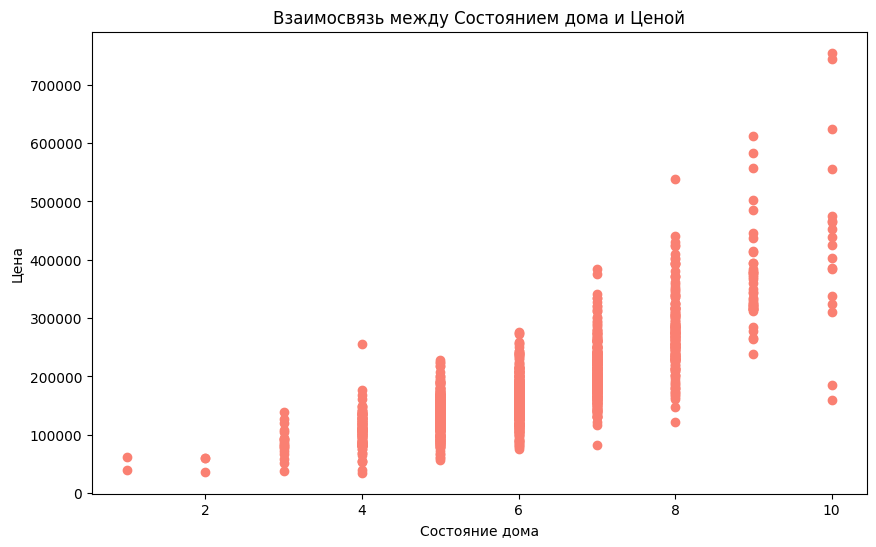

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(df['OverallQual'], df['SalePrice'], color='salmon')
plt.title('Взаимосвязь между Состоянием дома и Ценой')
plt.xlabel('Состояние дома')
plt.ylabel('Цена')
plt.show()

<ipython-input-116-1d9acf4fbb80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='YearBuilt', y='SalePrice', data=df, palette='pastel')


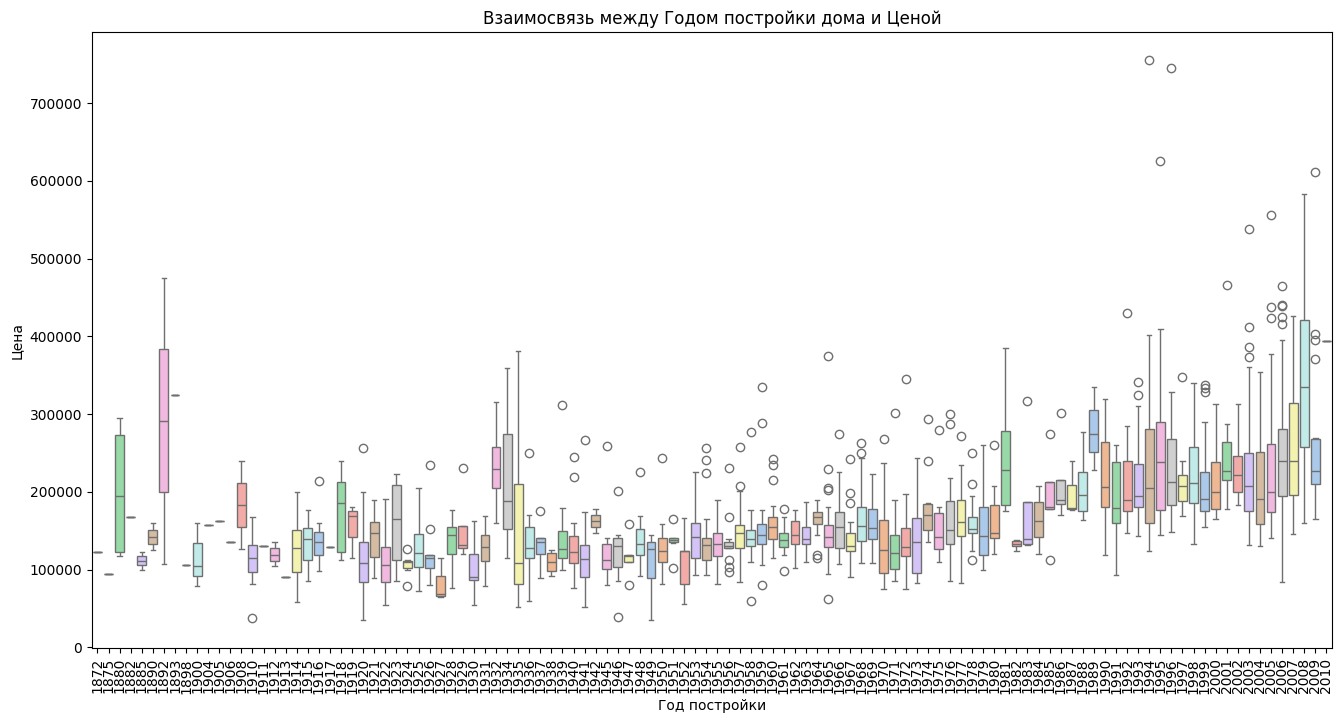

In [116]:
# Изучение взаимосвязи между 'YearBuilt' и 'SalePrice'
plt.figure(figsize=(16, 8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df, palette='pastel')
plt.title('Взаимосвязь между Годом постройки дома и Ценой')
plt.xlabel('Год постройки')
plt.ylabel('Цена')
plt.xticks(rotation=90)
plt.show()

In [121]:
# # Изучение категориальных признаков
# categorical_features = df.select_dtypes(include=['object']).columns
# for feature in categorical_features:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x=feature, y='SalePrice', data=df, palette='pastel')
#     plt.title(f'Взаимосвязь между {feature} и SalePrice')
#     plt.xlabel(feature)
#     plt.ylabel('SalePrice')
#     plt.xticks(rotation=90)
#     plt.show()

# Применение One-Hot Encoding к категориальным признакам
df_encoded = pd.get_dummies(df, columns=categorical_features)


In [122]:
# Создание нового признака "Общая площадь"
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Создание нового признака "Возраст дома на момент продажи"
df['AgeAtSale'] = df['YrSold'] - df['YearBuilt']


In [123]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,AgeAtSale
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,2,2008,WD,Normal,208500,2566,5
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,5,2007,WD,Normal,181500,2524,31
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,9,2008,WD,Normal,223500,2706,7
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,2,2006,WD,Abnorml,140000,2473,91
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,12,2008,WD,Normal,250000,3343,8


In [124]:
# Сохранение очищенного и преобразованного набора данных
df.to_csv('cleaned_house_prices.csv', index=False)